In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)


In [2]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
merged_df = pd.merge(clinical_df,mouse_df, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = merged_df.groupby(["Drug", "Timepoint"]).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor)

mean_tumor_df = mean_tumor_df.reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = merged_df.groupby(["Drug", "Timepoint"]).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor)

sem_tumor_df = sem_tumor_df.reset_index()

# Preview DataFrame
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_df = mean_tumor_df.pivot_table(values = "Tumor Volume (mm3)", columns = "Drug", index = "Timepoint")

# Preview that Reformatting worked
mean_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
# Minor Data Munging to Re-Format the Data Frames
sem_tumor_df = sem_tumor_df.pivot_table(values = "Tumor Volume (mm3)", columns = "Drug", index = "Timepoint")

# Preview that Reformatting worked
sem_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


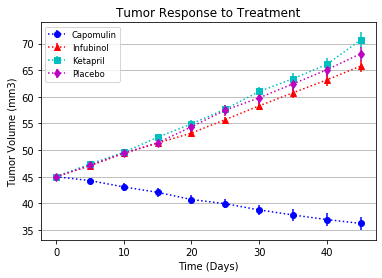

In [9]:
 # Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.errorbar(mean_tumor_df.index, mean_tumor_df["Capomulin"],yerr=sem_tumor_df["Capomulin"], fmt="o:b",label="Capomulin")
ax.errorbar(mean_tumor_df.index, mean_tumor_df["Infubinol"], yerr=sem_tumor_df["Infubinol"], fmt="^:r", label="Infubinol")
ax.errorbar(mean_tumor_df.index, mean_tumor_df["Ketapril"], yerr=sem_tumor_df["Ketapril"], fmt="s:c", label="Ketapril")
ax.errorbar(mean_tumor_df.index, mean_tumor_df["Placebo"], yerr=sem_tumor_df["Placebo"], fmt="d:m", label="Placebo")                                                    

plt.title("Tumor Response to Treatment")                        
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = merged_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]


# Convert to DataFrame
met_mean_df = pd.DataFrame(met_mean)

# Preview DataFrame
met_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = merged_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sem_df = pd.DataFrame(met_sem)

# Preview DataFrame
met_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
 # Minor Data Munging to Re-Format the Data Frames
met_mean_df = met_mean_df.pivot_table(values = "Metastatic Sites", columns = "Drug", index = "Timepoint")

# Preview that Reformatting worked
met_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
 # Minor Data Munging to Re-Format the Data Frames
met_sem_df = met_sem_df.pivot_table(values = "Metastatic Sites", columns = "Drug", index = "Timepoint")

# Preview that Reformatting worked
met_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


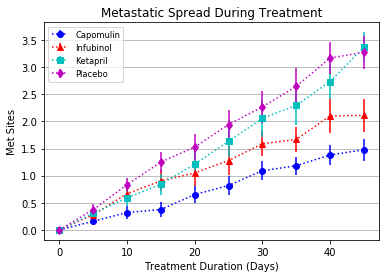

In [14]:
 # Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.errorbar(met_mean_df.index, met_mean_df["Capomulin"],yerr=met_sem_df["Capomulin"], fmt="o:b",label="Capomulin")
ax.errorbar(met_mean_df.index, met_mean_df["Infubinol"], yerr=met_sem_df["Infubinol"], fmt="^:r", label="Infubinol")
ax.errorbar(met_mean_df.index, met_mean_df["Ketapril"], yerr=met_sem_df["Ketapril"], fmt="s:c", label="Ketapril")
ax.errorbar(met_mean_df.index, met_mean_df["Placebo"], yerr=met_sem_df["Placebo"], fmt="d:m", label="Placebo")                                                    

plt.title("Metastatic Spread During Treatment")                        
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met Sites")
plt.grid(axis="y")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment")

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = merged_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df = mouse_count_df.rename(columns= {"Mouse ID": "Mouse Count"})

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
 # Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot_table(values = "Mouse Count", columns = "Drug", index = "Timepoint")

# Preview that Reformatting worked
mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


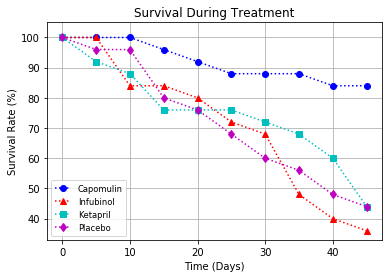

In [17]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

ax.errorbar(mouse_count_df.index, mouse_count_df["Capomulin"]*4, fmt="o:b",label="Capomulin")
ax.errorbar(mouse_count_df.index, mouse_count_df["Infubinol"]*4, fmt="^:r", label="Infubinol")
ax.errorbar(mouse_count_df.index, mouse_count_df["Ketapril"]*4, fmt="s:c", label="Ketapril")
ax.errorbar(mouse_count_df.index, mouse_count_df["Placebo"]*4, fmt="d:m", label="Placebo")                                                    

plt.title("Survival During Treatment")                        
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid(axis="both")
plt.ylim(33,105)
plt.legend(loc="lower left", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Survival During Treatment.png")

In [18]:
# Calculate the percent changes for each drug
percent_change = 100*(mean_tumor_df.loc[45] - mean_tumor_df.loc[0])/mean_tumor_df.loc[0]

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

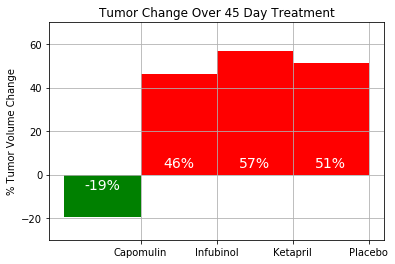

In [19]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (percent_change["Capomulin"],
                  percent_change["Infubinol"],
                  percent_change["Ketapril"],
                  percent_change["Placebo"])
percent_change

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_change))
pass_drug = ax.bar(ind[0],percent_change[0], width = 1, color = "green")
fail_drug = ax.bar(ind[1:],percent_change[1:], width = 1, color = "red")

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")                        
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_ylabel("% Tumor Volume Change")
plt.grid(axis="both")
plt.ylim(-30,70)


def passlabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)



def faillabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

# Call functions to implement the function calls
passlabel(pass_drug)
faillabel(fail_drug)

# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()
